<a href="https://colab.research.google.com/github/SebasBeta7/Curso_Lenguaje_Programacion/blob/main/Examen_Instituciobal_SBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# Subir la base de datos
import pandas as pd

#Cargar BD, especificando la codificación 'latin-1' y estableciendo el índice
try:
    df=pd.read_csv('/content/Flujos_de_caja.csv', encoding='latin-1', sep=';', index_col=0)
except FileNotFoundError:
    print("Error: No se encontró el archivo 'Flujos_de_caja.csv'. Asegúrate de que esté en la ubicación correcta.")
    df = None
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")
    df = None

In [59]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [60]:
# Variables globales para almacenar resultados
resultados_vpn = {}
resultados_tir = {}

def calcular_vpn(tasa_descuento, flujos_caja):
    """Calcula el Valor Presente Neto (VPN)."""
    return npf.npv(tasa_descuento, flujos_caja)

def calcular_tir(flujos_caja):
    """Calcula la Tasa Interna de Retorno (TIR)."""
    try:
        return npf.irr(flujos_caja)
    except:
        return np.nan # Retornamos NaN en caso de error

def realizar_calculos():
    global df, resultados_vpn, resultados_tir
    if df is not None:
        tasa_descuento = 0.10  # Tasa de descuento anual
        for proyecto, row in df.iterrows():
            try:
                inversion_inicial = float(row.iloc[0])
                flujos_caja_posteriores = [float(x) for x in row.iloc[1:].values.tolist()]
                flujos_caja_total = [-inversion_inicial] + flujos_caja_posteriores

                # Calcular VPN
                vpn = calcular_vpn(tasa_descuento, flujos_caja_total)
                resultados_vpn[proyecto] = vpn

                # Calcular TIR
                tir = calcular_tir(flujos_caja_total)
                resultados_tir[proyecto] = tir

            except ValueError as e:
                print(f"Error al procesar datos para el proyecto '{proyecto}': {e}")
                resultados_vpn[proyecto] = np.nan
                resultados_tir[proyecto] = np.nan
        print("Cálculos de VPN y TIR completados.")
    else:
        print("No se pueden realizar cálculos porque los datos no se cargaron correctamente.")


Usted ha seleccionado el boton de graficar resultados


<ipython-input-63-1f7601ff0af6>:52: UserWarning: Glyph 154 (\x9a) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 154 (\x9a) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


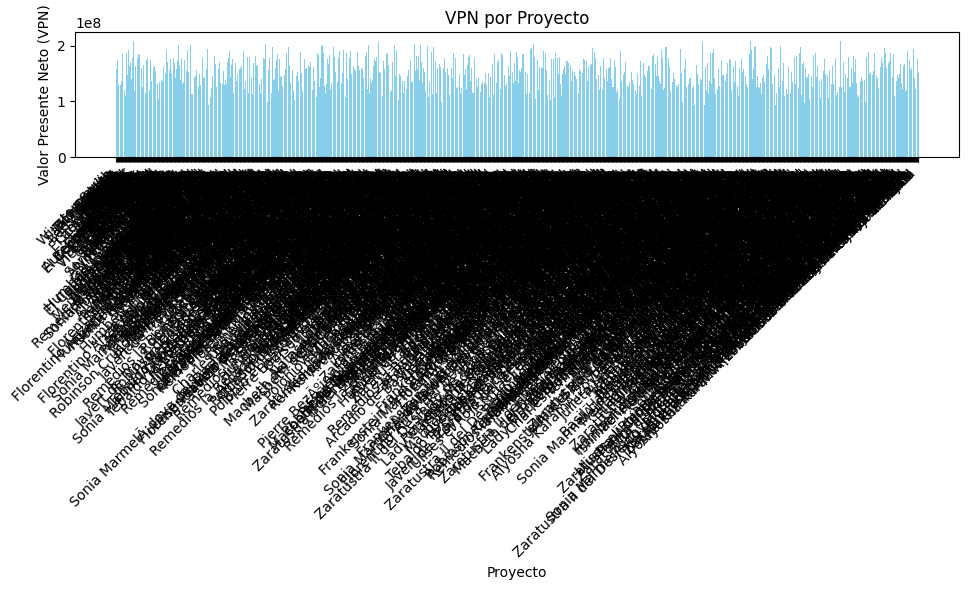

In [63]:
# Funcion para mostrar el menú interactivo con botones
def mostrar_menu():
    clear_output() # Limpia la pantalla
    print("Seleccione una opción:")

    # Crear los botones de cada opcion:
    boton_visualizar = widgets.Button(description="Visualizar datos")
    boton_calcular = widgets.Button(description="Calcular VPN/TIR")
    boton_graficar = widgets.Button(description="Graficar resultados")
    boton_salir = widgets.Button(description="Salir")

    # funciones que se ejecutan cuando se hacen clic en cada boton
    def boton_visualizar_click(b):
        clear_output()
        print("Usted ha seleccionado el boton de visualizar datos")
        if df is not None:
            print(df.head())
        else:
            print("No hay datos para mostrar. Por favor, asegúrese de que el archivo se cargó correctamente.")
        display(widgets.VBox([boton_visualizar, boton_calcular, boton_graficar, boton_salir]))

    def boton_calcular_click(b):
        clear_output()
        print("Usted ha seleccionado el boton de calcular VPN/TIR")
        if resultados_vpn and resultados_tir:
            print("\n--- Resultados del VPN ---")
            for proyecto, vpn in resultados_vpn.items():
                print(f"VPN para {proyecto}: ${vpn:.2f}")
            print("\n--- Resultados de la TIR ---")
            for proyecto, tir in resultados_tir.items():
                if np.isnan(tir):
                    print(f"TIR para {proyecto}: No se pudo calcular")
                else:
                    print(f"TIR para {proyecto}: {tir * 100:.2f}%")
        else:
            print("Los cálculos de VPN y TIR no se han realizado. Por favor, seleccione 'Calcular VPN/TIR' nuevamente.")
        display(widgets.VBox([boton_visualizar, boton_calcular, boton_graficar, boton_salir]))

    def boton_graficar_click(b):
        clear_output()
        print("Usted ha seleccionado el boton de graficar resultados")
        if resultados_vpn:
            proyectos = list(resultados_vpn.keys())
            vpn_values = list(resultados_vpn.values())

            plt.figure(figsize=(10, 6))
            plt.bar(proyectos, vpn_values, color='skyblue')
            plt.xlabel('Proyecto')
            plt.ylabel('Valor Presente Neto (VPN)')
            plt.title('VPN por Proyecto')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("No se han calculado el VPN para graficar.")
        display(widgets.VBox([boton_visualizar, boton_calcular, boton_graficar, boton_salir]))
    def boton_salir_click(b):
        clear_output()
        print("Usted ha seleccionado el boton de salir")

    # Conexion del boton con la funcion respectiva
    boton_visualizar.on_click(boton_visualizar_click)
    boton_calcular.on_click(boton_calcular_click)
    boton_graficar.on_click(boton_graficar_click)
    boton_salir.on_click(boton_salir_click)

    # Mostrar los botones en la pantalla
    display(widgets.VBox([boton_visualizar, boton_calcular, boton_graficar, boton_salir]))

# Realizar los cálculos al inicio para que estén disponibles cuando se presione el botón
if df is not None:
    realizar_calculos()

# ejecutar el menu
mostrar_menu()